# Cirrhosis Predictor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
data = pd.concat([train, test])
data.set_index('id', inplace=True)
data

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,NaN
13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0,NaN
13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,NaN


## Data Cleaning/Wrangling:

No NANS due to (given data - not me):
1. Drop all the rows where miss value (NA) were present in the Drug column
2. Impute missing values with mean results
3. One-hot encoding for all category attributes

In [4]:
data.isna().sum()

N_Days              0
Drug                0
Age                 0
Sex                 0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
Status           5271
dtype: int64

Converting Age from days to years:

In [5]:
data['Age'] = data['Age'] / 365.0

## Descriptive Analysis:

In [6]:
data.shape

(13176, 19)

In [7]:
data.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [8]:
data.dtypes

N_Days             int64
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
data.drop(columns={'Stage'}).describe()
# Stage = categorical

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,2033.583030,50.473962,2.596847,351.331815,3.544221,84.222416,1814.540225,114.197725,115.318534,264.746812,10.630823
std,1091.249998,9.978656,3.828640,197.413677,0.349706,76.558760,1916.383653,48.861248,52.557379,87.511668,0.786116
min,41.000000,26.295890,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1234.000000,42.772603,0.700000,248.000000,3.350000,39.000000,824.000000,75.950000,84.000000,210.000000,10.000000
50%,1874.000000,51.284932,1.100000,299.000000,3.580000,63.000000,1166.000000,106.950000,104.000000,264.000000,10.600000
75%,2689.000000,56.668493,3.000000,390.000000,3.770000,102.000000,1840.000000,137.950000,139.000000,316.000000,11.000000
max,4795.000000,78.493151,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


## EDA:

Correlation Matrix:

In [10]:
numeric_feats = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
corr = data[numeric_feats].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan

(corr
    .style
    .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
    .highlight_null(color='f1f1f1')
    .format(precision=2)
)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
N_Days,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Age,-0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bilirubin,-0.34,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan
Cholesterol,-0.14,-0.06,0.31,nan,nan,nan,nan,nan,nan,nan,nan
Albumin,0.26,-0.11,-0.30,-0.09,nan,nan,nan,nan,nan,nan,nan
Copper,-0.28,0.09,0.44,0.17,-0.23,nan,nan,nan,nan,nan,nan
Alk_Phos,-0.02,0.02,0.13,0.13,-0.09,0.13,nan,nan,nan,nan,nan
SGOT,-0.23,-0.02,0.36,0.34,-0.21,0.33,0.13,nan,nan,nan,nan
Tryglicerides,-0.18,0.02,0.32,0.28,-0.11,0.28,0.10,0.15,nan,nan,nan
Platelets,0.14,-0.10,-0.08,0.09,0.14,-0.10,0.04,-0.04,0.02,nan,nan


- No strong linear correlation, but Bilirubin has relatively the strongest correlation w/ other variables

Histograms for all quantitative variables (includes Status):

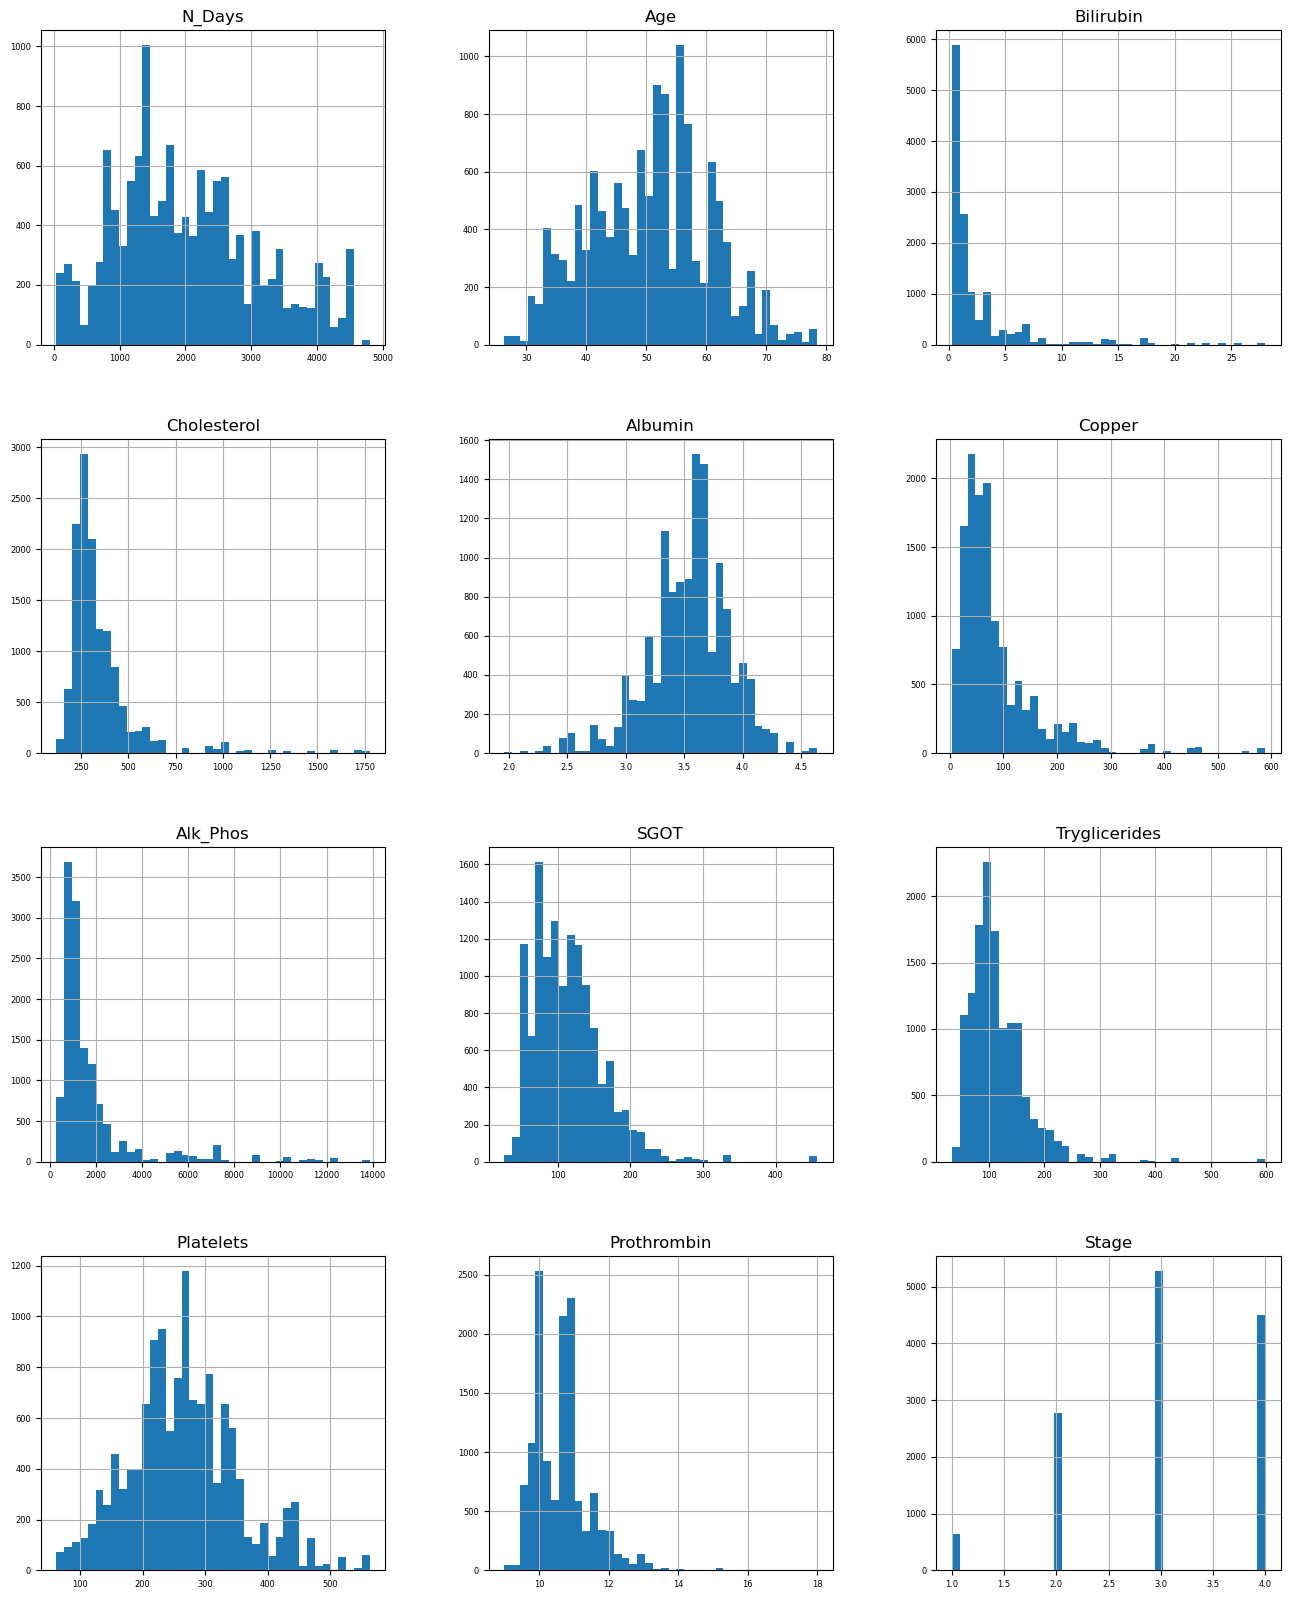

In [15]:
data.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

## Predictive Analysis:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import log_loss

In [ ]:
X = train.drop(columns={'Status'})
Y = train.Status

In [ ]:
rfc = RandomForestClassifier()
